# Visualisation is Beautiful: Data Science Salary Visualisation Challenge

### Importing the library

In [1]:
# Basic analitical library
import pandas as pd
import numpy as np
import re

In [2]:
# Plotting missing values
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Setting the env
import os
os.environ['PROJ_LIB'] = r'C:\Users\user\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

In [5]:
# Plotting Map
from matplotlib.pyplot import figure, show, suptitle
from matplotlib import cm
from matplotlib.dates import date2num
from mpl_toolkits.basemap import Basemap

In [6]:
%matplotlib inline 

In [7]:
# Text mining libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

### Reading the data

In [8]:
data = pd.read_csv('Final_Train_Dataset.csv')

In [9]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [10]:
data.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


### Plotting missing value

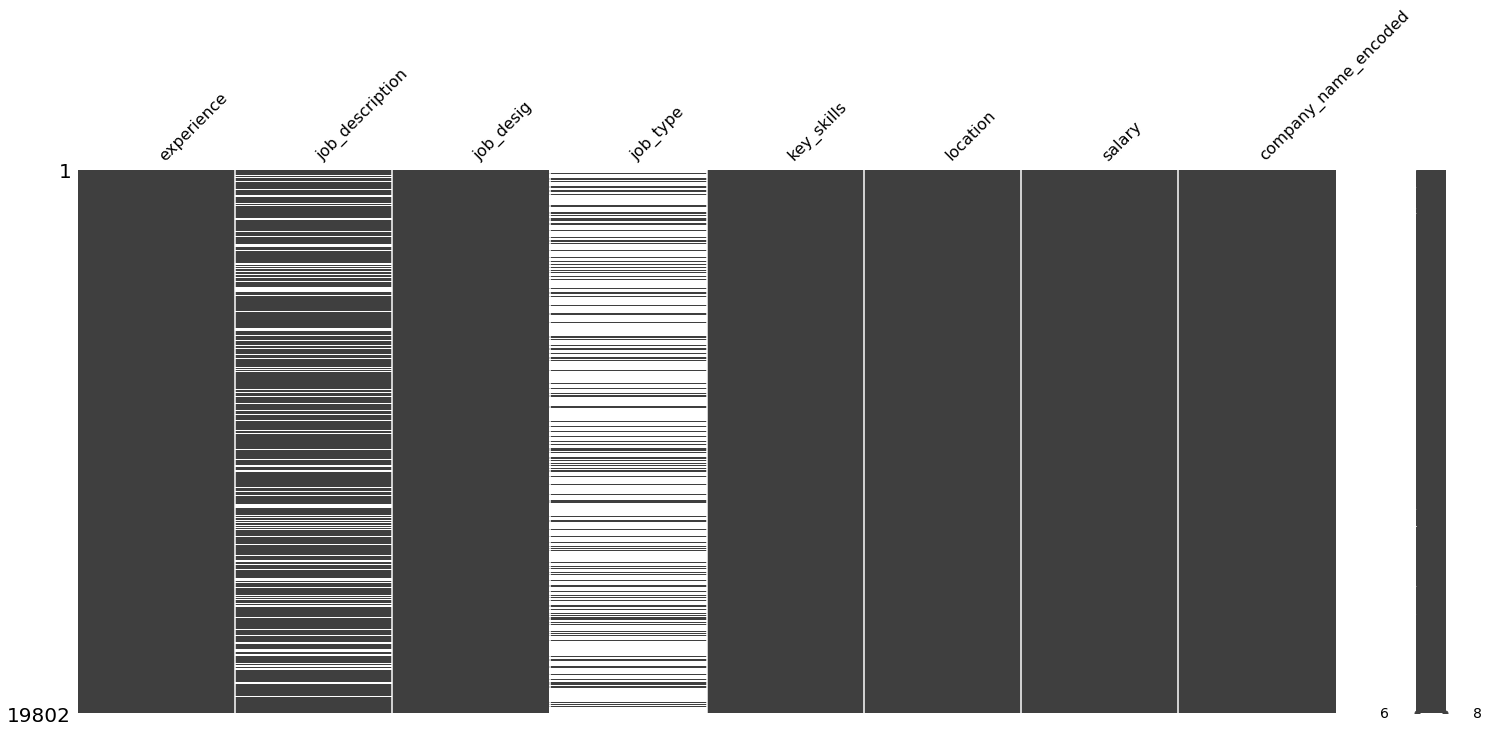

In [11]:
msno.matrix(data)

### Extracting the features

In [12]:
# Splitting Experience Column
data['exp'] = data['experience'].str.split().str[0]

In [13]:
# Extracting Min and Max Experience
data['MinExp'] = data["exp"].str.split("-", expand = True)[0].astype('int')
data['MaxExp'] = data["exp"].str.split("-", expand = True)[1].astype('int')

In [14]:
# Mean Experience
data['MeanExp'] = (data['MaxExp'] + data['MinExp']) / 2

In [15]:
data['MinExp'].value_counts().head()



2    3196
3    2713
5    2330
1    2266
4    1911
Name: MinExp, dtype: int64

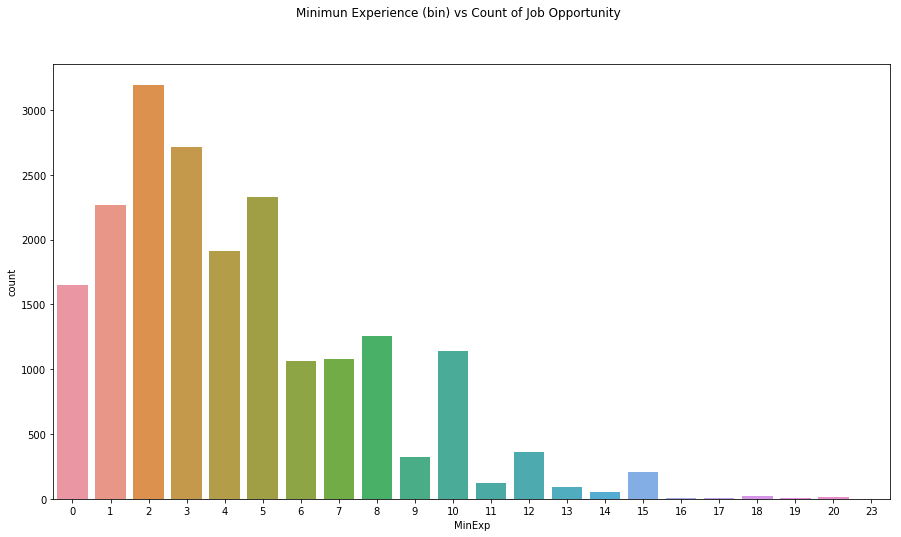

In [16]:
figure(figsize=(15,8))
suptitle("Minimun Experience (bin) vs Count of Job Opportunity")
sns.countplot(data=data,x='MinExp')
show()

In [17]:
# Extracting Min and Max Salary
data['min_sal'] = data["salary"].str.split("to", expand = True)[0].astype('int')
data['max_sal'] = data["salary"].str.split("to", expand = True)[1].astype('int')

In [18]:
# Mean of Salary
data['mean_sal'] = (data['max_sal'] + data['min_sal']) / 2

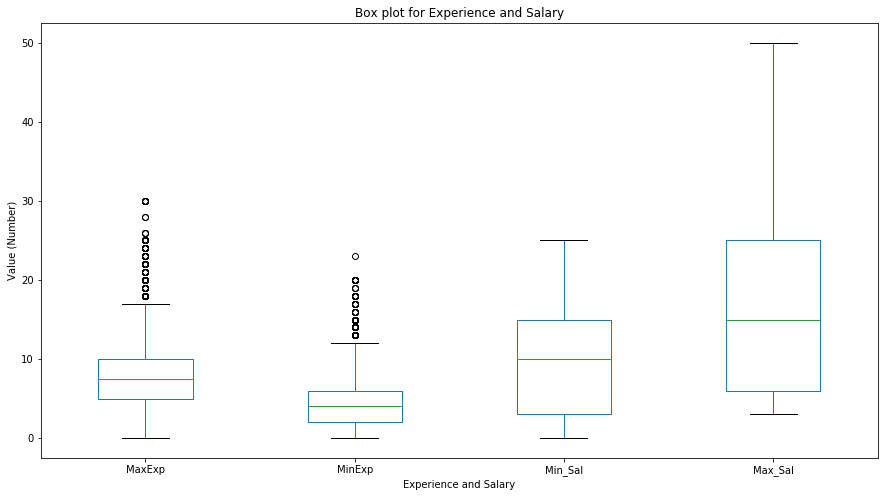

In [19]:

MinExp = data['MinExp'].tolist()
MaxExp = data['MaxExp'].tolist() 
Min_Sal = data['min_sal'].tolist()
Max_Sal = data['max_sal'].tolist()

df1 = pd.DataFrame({'MaxExp': MaxExp,
                    'MinExp': MinExp,
                    'Min_Sal' : Min_Sal,
                    'Max_Sal': Max_Sal}, index=MinExp )

ax = df1.plot.box(rot=0,figsize=(15,8))
ax.set_xlabel('Experience and Salary')
ax.set_ylabel('Value (Number)')

plt.title('Box plot for Experience and Salary')
plt.show()

In [20]:
# Aggregation on Experience and salary
aggregation = {
    'MaxExp' :{
        'max': 'max',
        'count': 'count',
    },
    
    'MeanExp' :{
        'mean': 'mean'
    },
    'min_sal':{
        'min': 'min'
    },
    'max_sal':{
        'max': 'max'
    },
    'mean_sal':{
        'mean': 'mean'
    }
}
df = data.groupby('MinExp').agg(aggregation)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [21]:
df = df.reset_index()

In [22]:
df.head()

MinExp MaxExp         MeanExp min_sal max_sal   mean_sal
            max count      mean     min     max       mean
0      0      5  1653  1.361162       0      50   2.785239
1      1      6  2266  2.606134       0      50   5.433804
2      2      7  3196  3.690864       0      50   7.681008
3      3      8  2713  4.753594       0      50  10.264099
4      4      9  1911  5.860283       0      50  12.265568

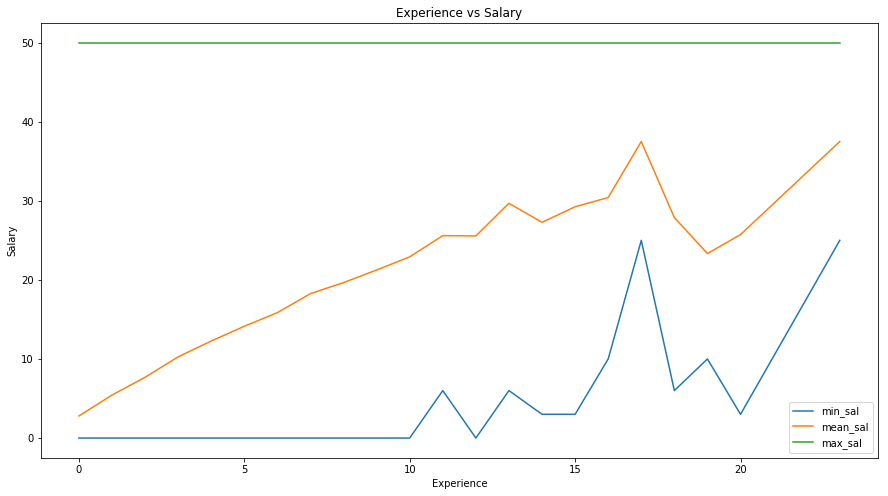

In [23]:
# Experience vs Salary
index = df['MinExp'].tolist()
min_sal = df['min_sal']['min'].tolist()
max_sal = df['max_sal']['max'].tolist()
mean_sal = df['mean_sal']['mean'].tolist() 
df1 = pd.DataFrame({'min_sal': min_sal,
                    'mean_sal' : mean_sal,
                    'max_sal': max_sal}, index=index)


ax = df1.plot.line(rot=0,figsize=(15,8))
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

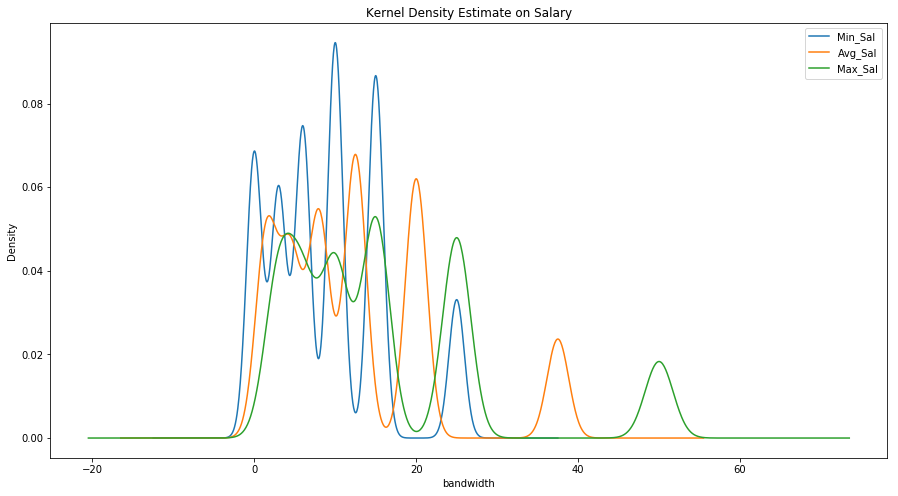

In [24]:
# Kernel Density Estimate on Salary
index = data['MinExp'].tolist()
Min_Sal = data['min_sal'].tolist()
Max_Sal = data['max_sal'].tolist()
Avg_Sal = data['mean_sal'].tolist() 
df1 = pd.DataFrame({'Min_Sal' : Min_Sal,
                    'Avg_Sal': Avg_Sal,
                    'Max_Sal': Max_Sal}, index=index)

ax = df1.plot.kde(rot=0,figsize=(15,8))
ax.set_xlabel('bandwidth')
ax.set_ylabel('Density')
plt.title('Kernel Density Estimate on Salary')
plt.show()

### Extracting insight from Location column

In [26]:
Job_location = pd.Series(' '.join(data['location']).split(',')).value_counts()[:20]

Job_location

 Bengaluru         229
 Gurgaon           175
 Mumbai            172
 Chennai           153
 Hyderabad         148
 Pune               98
 Delhi              80
 Mumbai Suburbs     74
 Kolkata            73
 Delhi NCR          49
 Chandigarh         43
 Jaipur             41
 Noida              38
 Navi Mumbai        30
 Ahmedabad          30
 Lucknow            29
 Faridabad          27
 Kochi              27
 Trivandrum         26
 Ghaziabad          21
dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a bo

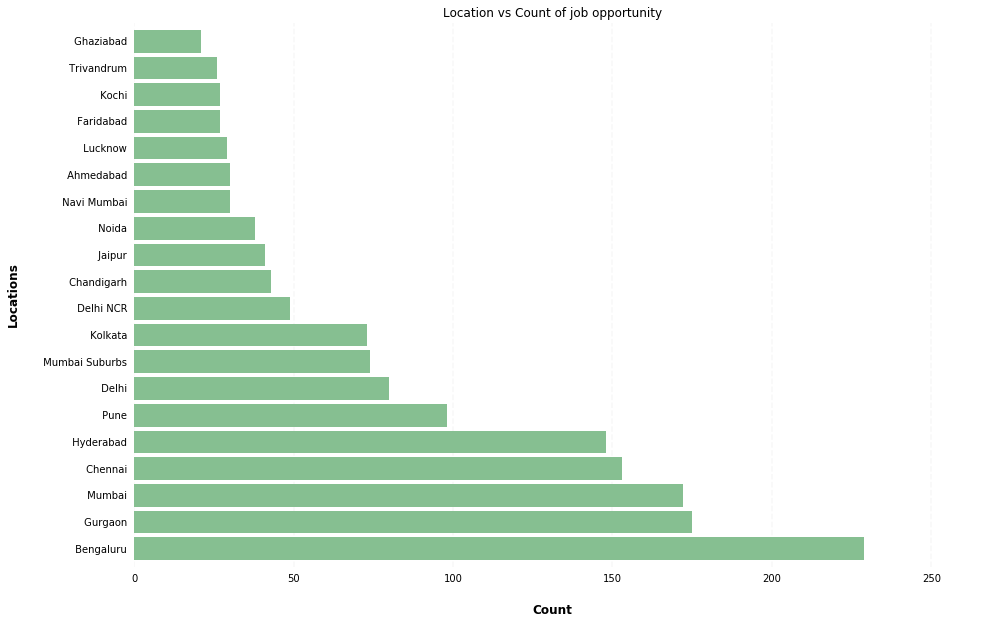

In [28]:
ax = Job_location.plot(kind='barh', figsize=(15, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Locations", labelpad=20, weight='bold', size=12)

plt.title('Location vs Count of job opportunity')
plt.show()

### Extracting insight from company_name_encoded column

In [29]:
data['company_name_encoded'].value_counts()[:5]

190     720
1969    323
1305    235
1988    235
3319    222
Name: company_name_encoded, dtype: int64

In [30]:
company = data.groupby('company_name_encoded')['mean_sal'].sum().sort_values(ascending=False)[:20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a bo

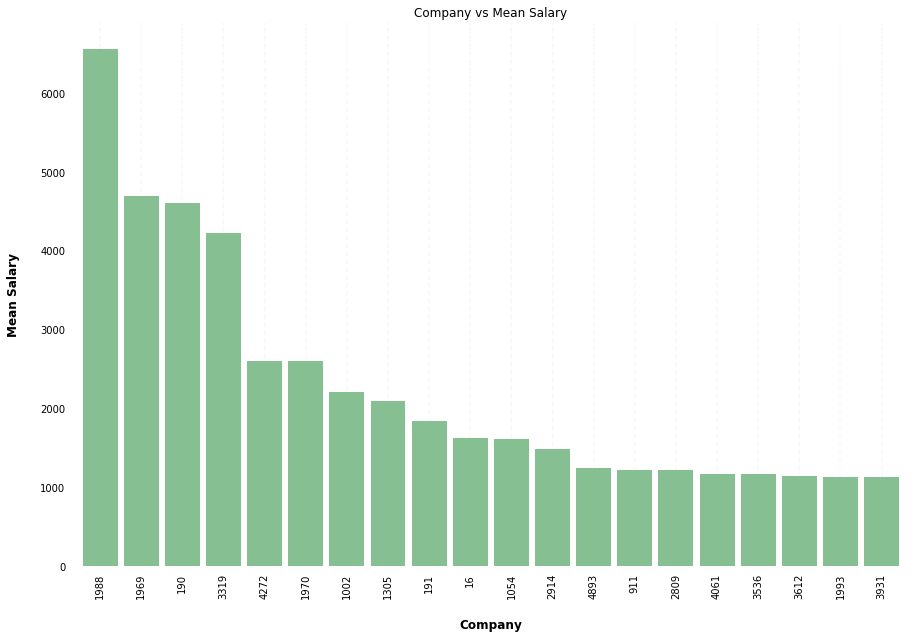

In [31]:
# Plotting Company vs Mean Salary
ax = company.plot(kind='bar', figsize=(15, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Company", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Mean Salary", labelpad=20, weight='bold', size=12)

plt.title('Company vs Mean Salary')
plt.show()

### Text mining on job_description coloumn

In [32]:
import re
from nltk.corpus import RegexpTokenizer as regextoken
stop = stopwords.words('english')
lmtzr = nltk.stem.WordNetLemmatizer()
#table = str.maketrans({key: None for key in string.punctuation})

def text_preprocessing(text):
    tokenizer = regextoken('\w+') # regular expression to select one or more word character
    text = re.sub(r'\s+', ' ', str(text)) # substitute one or more whitespace with one whitespace
    #text = re.sub(r'[\d]', '', str(text)) # substitute occuerence of single
    #text = text.translate(table) # remove punctuations
    sentences = nltk.tokenize.sent_tokenize(text)
    sentence_tokens = [tokenizer.tokenize(sentence) for sentence in sentences]
    # convert word to lower case and remove words that are part of nltk stop words
    tokens = [[word.lower() for word in sent if word not in stop] for sent in sentence_tokens] 
    tokens = [[lmtzr.lemmatize(word) for word in sent] for sent in tokens] # convert words to its root using lemmatization
    flattened_list = [y for x in tokens for y in x]
    token_refined = [word for word in flattened_list if len(word) > 1] # remove words with length 1
    string = str(' '.join(token_refined)) # join contents of list to form a continuous string
    return (string)

In [33]:
data["Job_Clean_text"] = data["job_description"].apply(lambda x: text_preprocessing(x))

In [34]:
data[['Job_Clean_text','job_description']].head()

,Job_Clean_text,job_description
0,exp minimum year good understanding ioc rule m...,Exp: Minimum 5 years;Good understanding of IOC...
1,he handled team atleast direct reportees mecha...,He should have handled a team of atleast 5-6 d...
2,must effective communicator written spoken str...,Must be an effective communicator (written & s...
3,10 year overall experience data engineering bi...,7 - 10 years of overall experience in data e...
4,chartered accountancy degree mba finance premi...,Chartered Accountancy degree or MBA in Finance...


### Word cloud on key_skills and job_description 

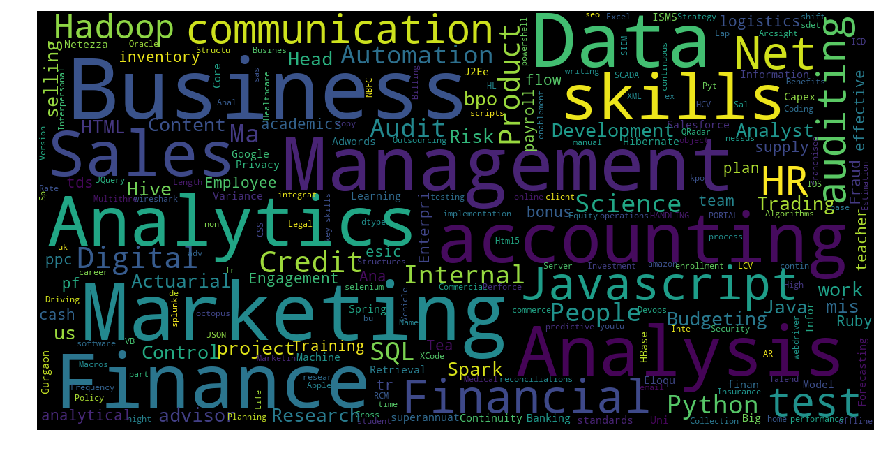

In [35]:
#Word cloud on key_skills

from wordcloud import WordCloud
import matplotlib as mpl

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data["key_skills"])

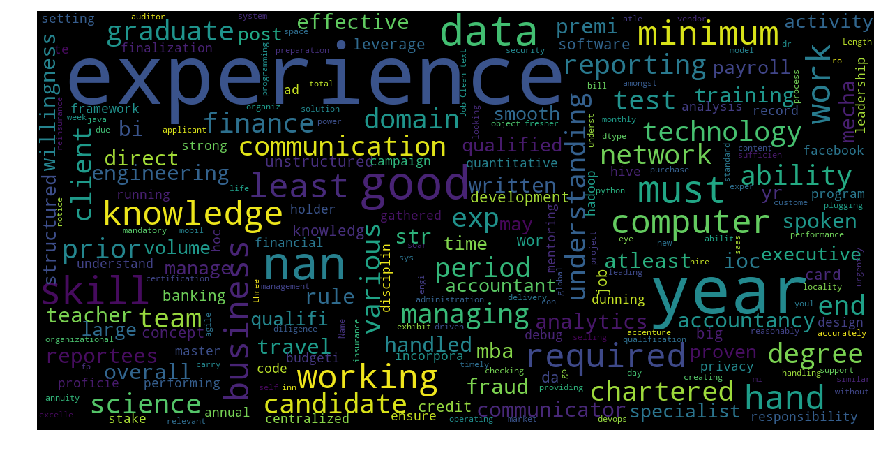

In [36]:
# Word cloud on job_description
show_wordcloud(data["Job_Clean_text"])

### Geographic Plot

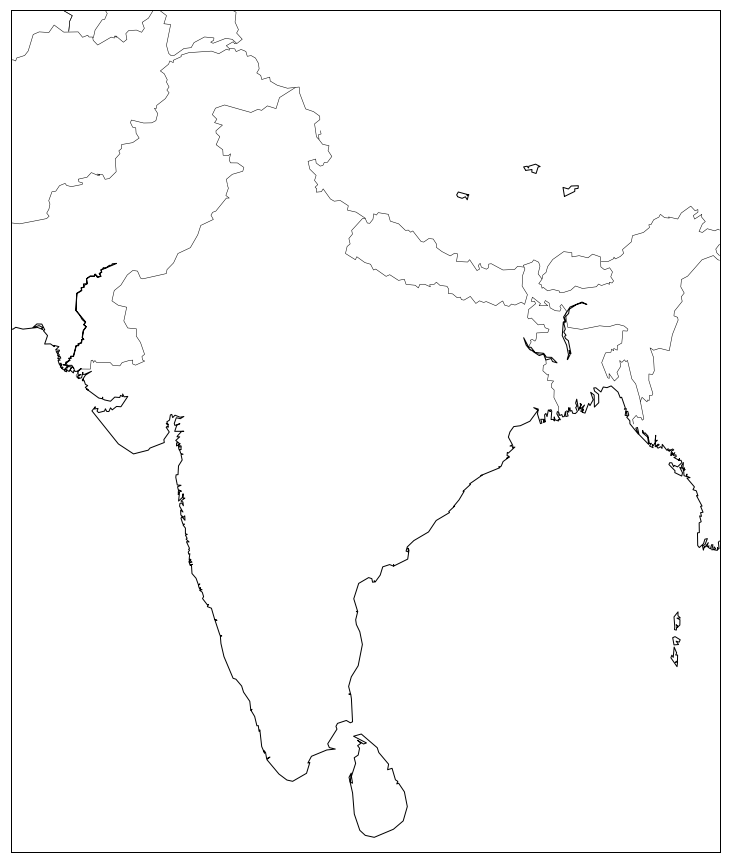

In [37]:
# Plotting locations on the Map
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

##### Note : Since the access to the Google Map API is restricted to the registered clients, not able to plot the location on the map. We can plot Top 10 salary paying companies, Top 10 number of companies ...etc on the map

In [38]:
data['job_desig'].unique()

array(['Senior Exploit and Vulnerability Researcher', 'Head SCM',
       'Deputy Manager - Talent Management & Leadership Development - Auto',
       ..., 'Principal Software Engineer - IT',
       'Opening for CA Fresher | Amravati',
       'Unity 3D Developer - Mobile Games Development'], dtype=object)